# Задание 6.

На прошлых занятиях вы иногда формировали гипотезы, в которых ЗП была бинарной, а НП — непрерывной. Теперь вы можете проверить их корректно.

Попробуйте сгенерировать несколько выборок из имеющихся данных (вы уже знаете как), создать регрессионные модели по выбору и протестировать их предиктивную способность на сгенерированных данных. Не забывайте про оценку качества и доверительные интервалы.


Гипотезу, в которой ЗП — бинарная, а НП — непрерывная, провелили логистической регрессией (гипотеза №4).

In [ ]:
# загрузка данных
from google.colab import files
uploader = files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
# загрузка пакетов
install.packages('readxl')
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

In [ ]:
data <- read_xlsx("/content/data.xlsx")

New names:
• `Choi...25` -> `Choi...92`
• `Tgi...26` -> `Tgi...93`
• `HDLi...27` -> `HDLi...94`
• `LDLi...28` -> `LDLi...95`
• `Choi...29` -> `Choi...96`
• `Tgi...30` -> `Tgi...97`
• `HDLi...31` -> `HDLi...98`
• `LDLi...32` -> `LDLi...99`


In [ ]:
data <- data %>%
    mutate(Patient.number = as.factor(Patient.number)) %>%
    mutate(Vial.number = as.factor(Vial.number)) %>%
    mutate(Sucrose = as.factor(Sucrose)) %>%
    mutate(Group = as.factor(Group)) %>%
    mutate(Sm = as.factor(Sm)) %>%
    mutate(Dm = as.factor(Dm)) %>%
    mutate(HT = as.factor(HT)) %>%
    mutate(LVH = as.factor(LVH)) %>%
    mutate(IHD = as.factor(IHD)) %>%
    mutate(MI = as.factor(MI)) %>%
    mutate(Str = as.factor(Str)) %>%
    mutate(A_C = as.factor(A_C)) %>%
    mutate(A_H = as.factor(A_H)) %>%
    mutate(A_D = as.factor(A_D)) %>%
    mutate(Statins = as.factor(Statins)) %>%
    mutate(Plaque = as.factor(Plaque)) %>%
    mutate(risk = as.factor(risk))

# Гипотеза №1.
Гипотеза: влияет ли уровнь липопротеинов низкой плотности на коэффициент атерогенности?

H0 - уровнь липопротеинов низкой плотности не влияет на коэффициент атерогенности.

H1 - уровнь липопротеинов низкой плотности влияет на коэффициент атерогенности.

ЗП - AI - количественная, непрерывная

НП - LDLi...95 - количественная, непрерывная

# Линейная регрессия

In [ ]:
data_lm <- lm(AI ~ LDLi...95, data = data)
summary(data_lm)


Call:
lm(formula = AI ~ LDLi...95, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0002 -0.3481 -0.2250  0.4824  1.1987 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.233354   0.593053  -0.393    0.699    
LDLi...95    0.018912   0.003524   5.367 6.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6169 on 16 degrees of freedom
Multiple R-squared:  0.6429,	Adjusted R-squared:  0.6206 
F-statistic: 28.81 on 1 and 16 DF,  p-value: 6.29e-05


Наблюдается линейная зависимость.

Оценка качества модели: R2 = 0.6206

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


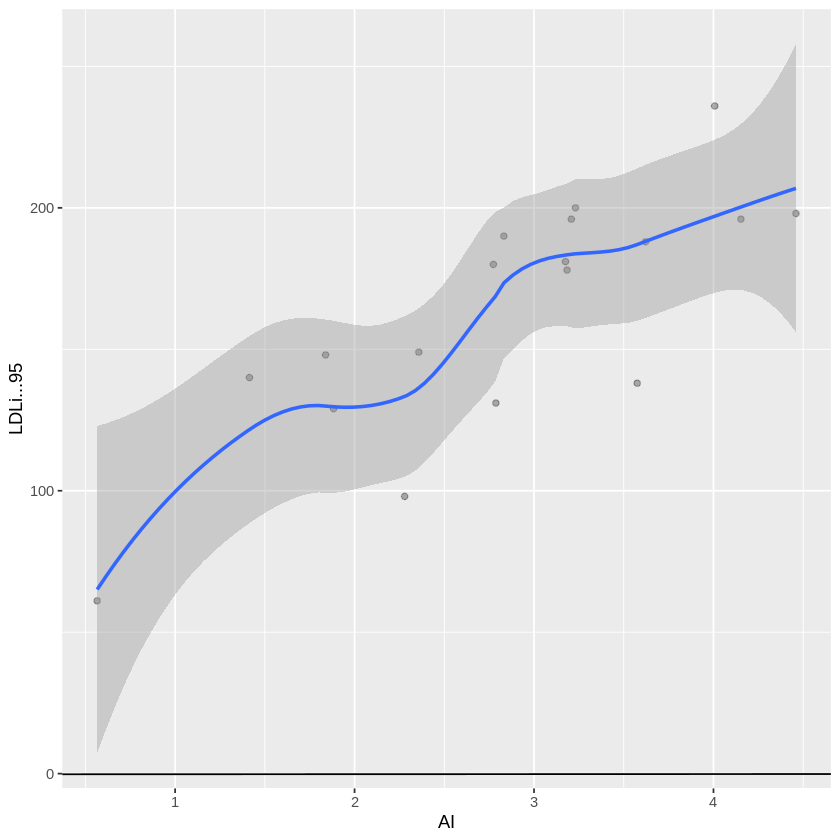

In [ ]:
ggplot(data = data, aes(x = AI, y = LDLi...95)) +
  geom_point(alpha = 0.3) +
  geom_abline(slope = data_lm$coefficients[2], intercept = data_lm$coefficients[1]) +
  geom_smooth()

Отвергаем нулевую гипотезу.

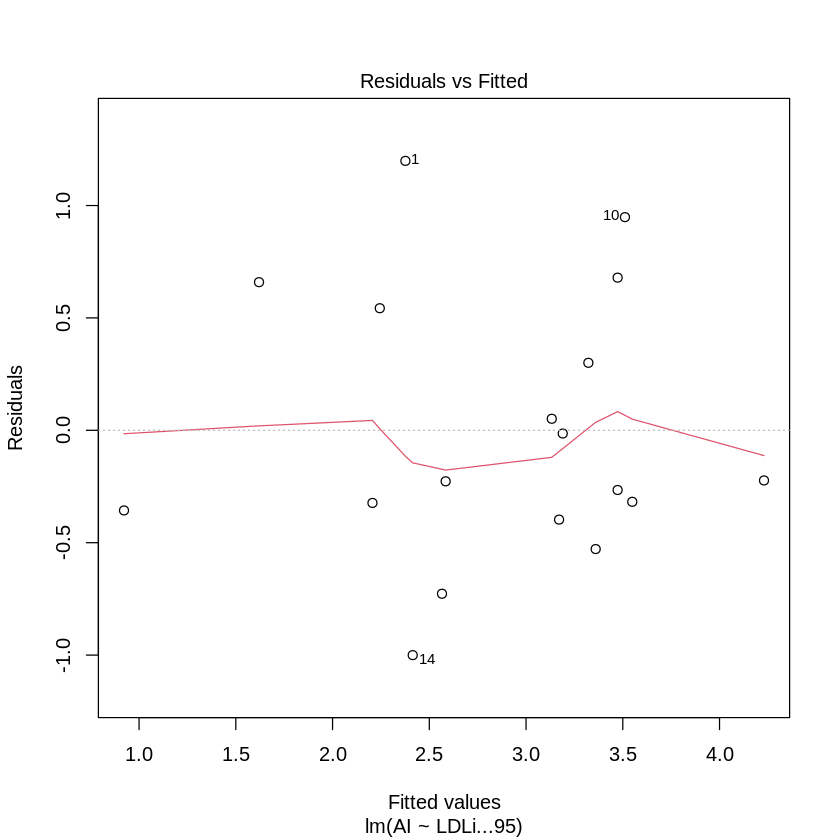

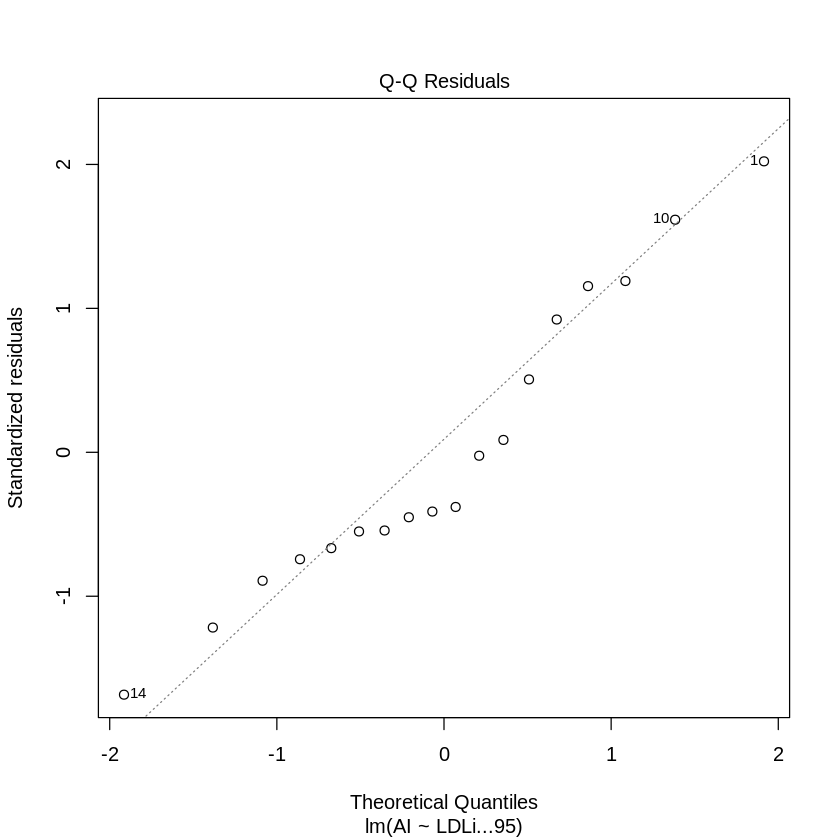

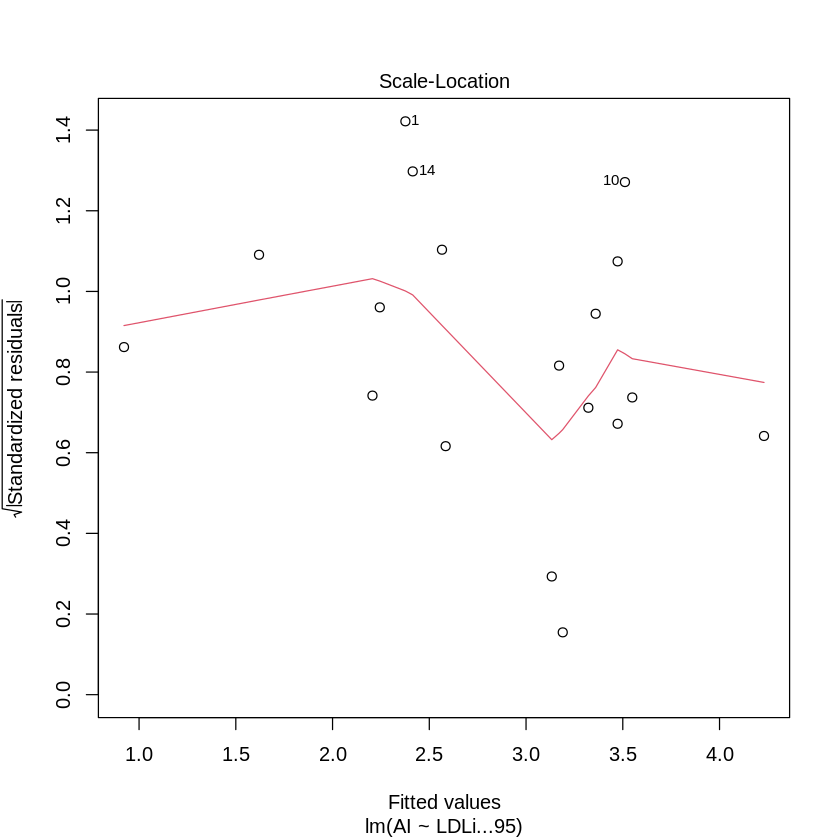

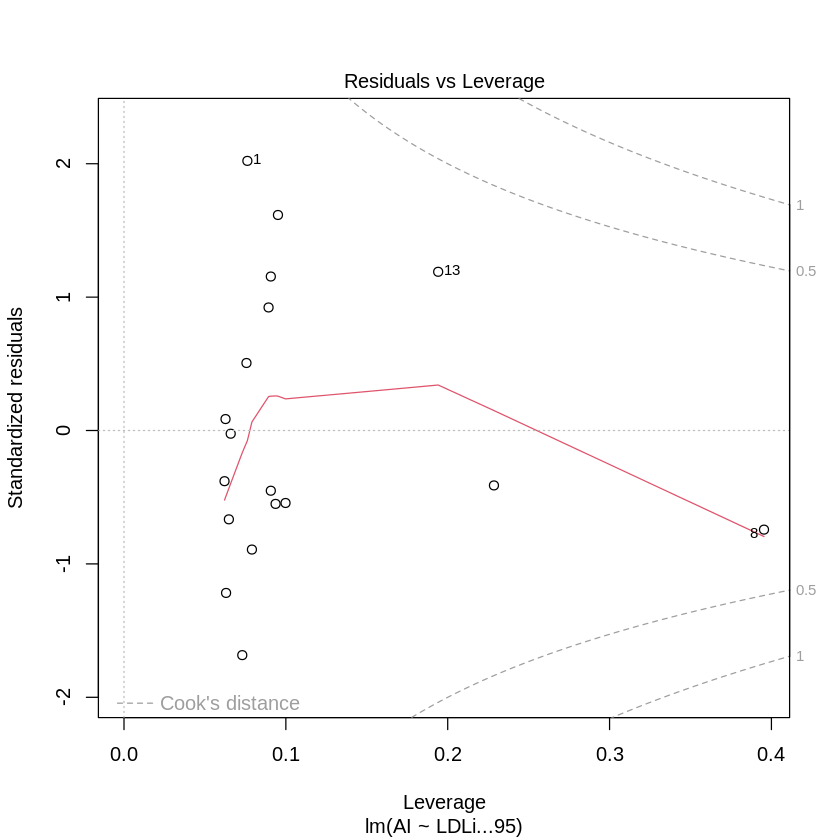

In [ ]:
plot(data_lm)

на Residuals vs Fitted симметричность относительно нижней и верхней части графика, разброс примерно одинаковый слева и справа

на qqplot остатки распределены нормально

на Scale-Location plot выбросы есть, гетероскедастичность остатков

на Residuals vs Leverage с правой стороны графика всего одна точка, невысокая по Y

# Гипотеза №2.
Гипотеза: влияет ли уровнь липопротеинов низкой плотности и уровнь липопротеинов высокой плотности вместе взятые на коэффициент атерогенности?

H0 - уровнь липопротеинов низкой плотности и уровнь липопротеинов высокой плотности вместе взятые не влияют на коэффициент атерогенности.

H1 - уровнь липопротеинов низкой плотности и уровнь липопротеинов высокой плотности вместе взятые влияют на коэффициент атерогенности.

ЗП - AI - количественная, непрерывная

НП - LDLi...95, HDLi...94 - количественные, непрерывные

# Множественная линейная регрессия

In [ ]:
model_mult <- lm(AI ~ LDLi...95 + HDLi...94, data = data)
summary(model_mult)


Call:
lm(formula = AI ~ LDLi...95 + HDLi...94, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31040 -0.22260 -0.09268  0.10598  0.58331 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.614240   0.487524   5.362 7.91e-05 ***
LDLi...95    0.013416   0.001875   7.154 3.31e-06 ***
HDLi...94   -0.031405   0.004333  -7.248 2.84e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3003 on 15 degrees of freedom
Multiple R-squared:  0.9207,	Adjusted R-squared:  0.9101 
F-statistic: 87.06 on 2 and 15 DF,  p-value: 5.56e-09


Наблюдается зависимость коэффициента атерогенности от уровня холестерина низкой и высокой плотности.

Оценка качества модели: R2 = 0.9101

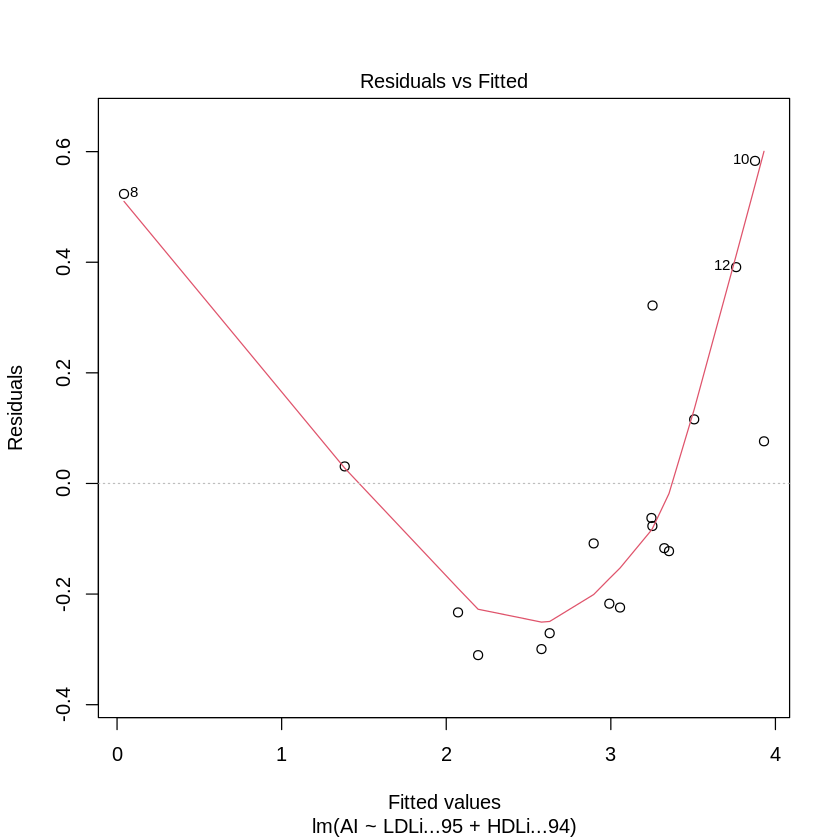

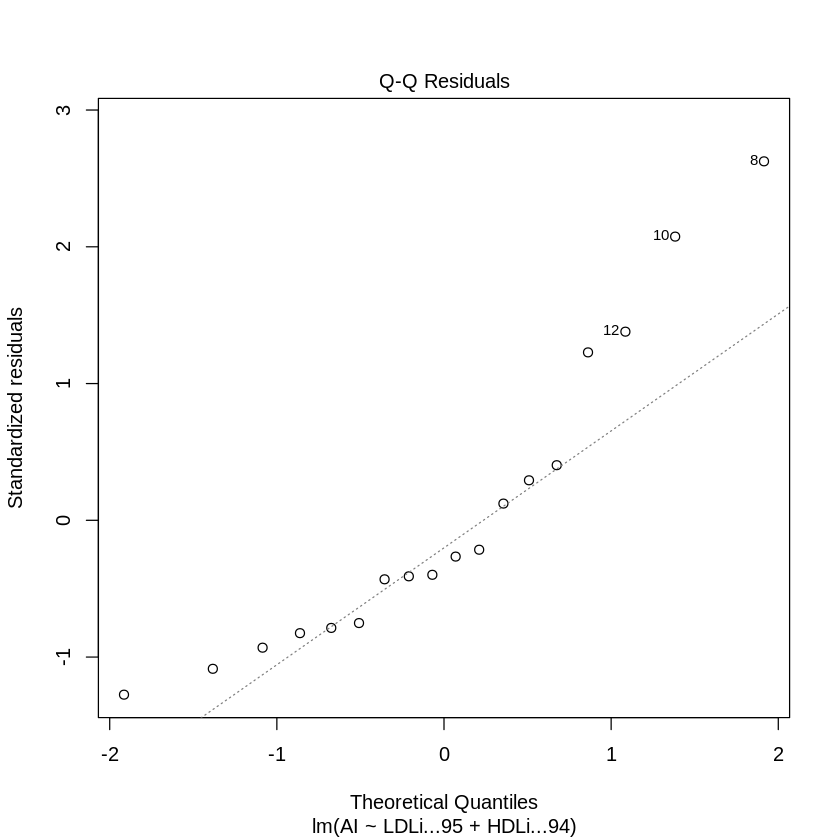

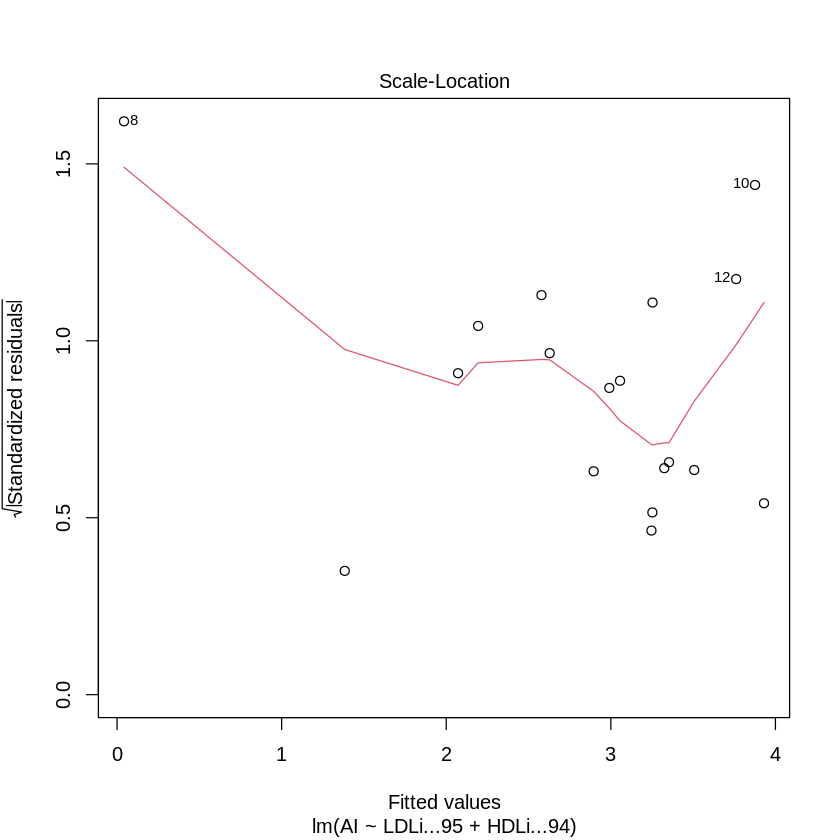

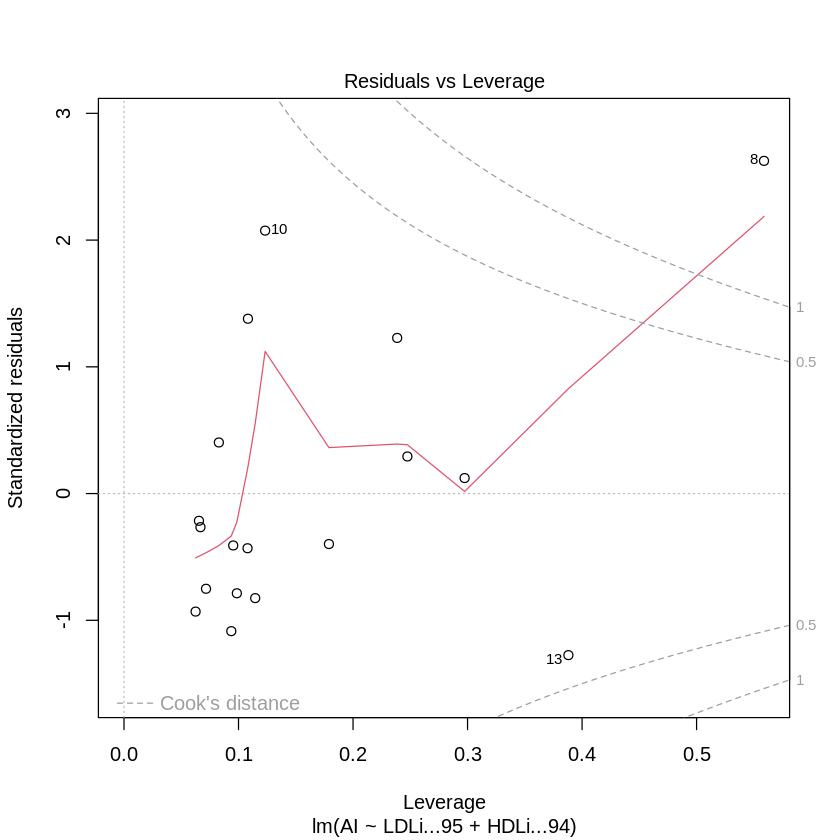

In [ ]:
plot(model_mult)

на Residuals vs Fitted с правой стороны есть точки, которые находятся высоко и низко по оси Y

на qqplot остатки распределены не нормально

на Scale-Location plot выбросы есть, гетероскедастичность остатков

на Residuals vs Leverage есть высокие точки и низкие точки по Y, которые могут поменять направление регрессии

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(car)

In [ ]:
car::vif(model_mult)

LDLi...95 HDLi...94 
 1.195489  1.195489

Мультиколлинеарности предикторов нет.

Отвергаем нулевую гипотезу.

# Гипотеза №3.
Гипотеза: влияет ли рост пациента на индекс массы тела?

H0 - рост пациента не влияет на его индекс массы тела.

H1 - рост пациента влияет на его индекс массы тела.

ЗП - BMI - количественная, непрерывная

НП - Ht - количественная, непрерывная

# Полиномиальная регрессия

Связь между предиктором и переменной отклика нелинейна. Между ростом и индексом массы тела квадратичная зависимость.

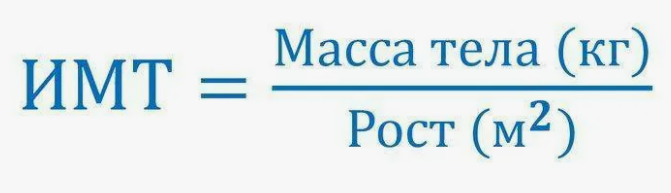

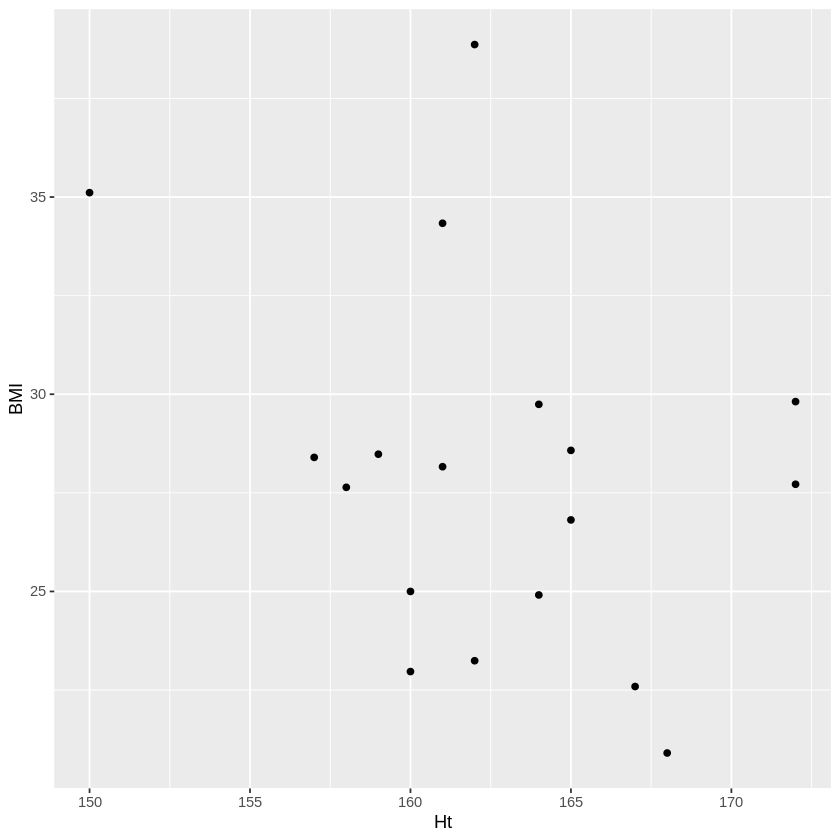

In [ ]:
ggplot(data, aes (x=Ht, y=BMI)) +
  geom_point()

График не показывает выраженной квадратичной зависимости вследствие малого количества данных.

In [ ]:
poly_model <- lm(BMI ~ poly(Ht,2), data=data)
summary(poly_model)


Call:
lm(formula = BMI ~ poly(Ht, 2), data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-5.731 -2.821  0.003  1.480 11.465 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    27.960      1.060  26.387 5.51e-14 ***
poly(Ht, 2)1   -6.187      4.496  -1.376    0.189    
poly(Ht, 2)2    4.703      4.496   1.046    0.312    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.496 on 15 degrees of freedom
Multiple R-squared:  0.1661,	Adjusted R-squared:  0.05495 
F-statistic: 1.494 on 2 and 15 DF,  p-value: 0.256


Модель не нашла зависимости между BMI и Ht

Оценка качества модели: R2 = 0.05495

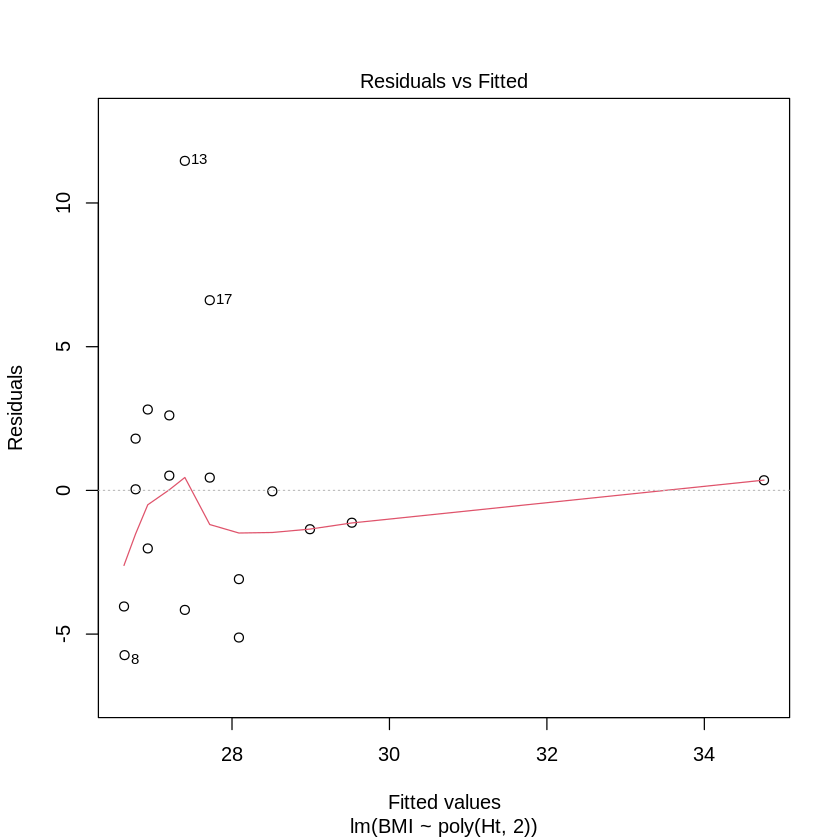

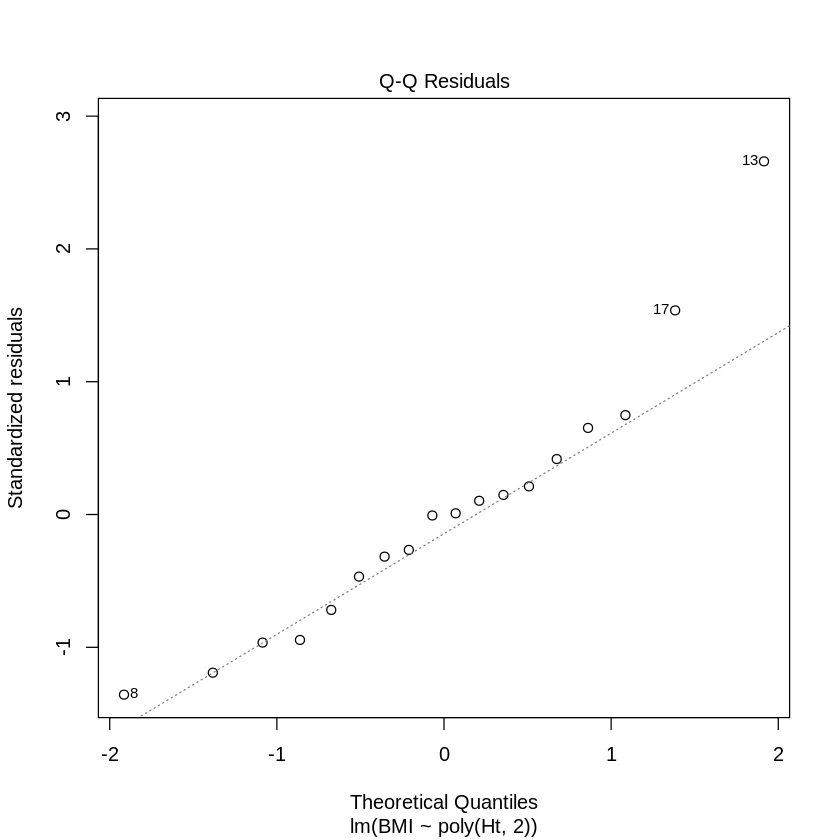

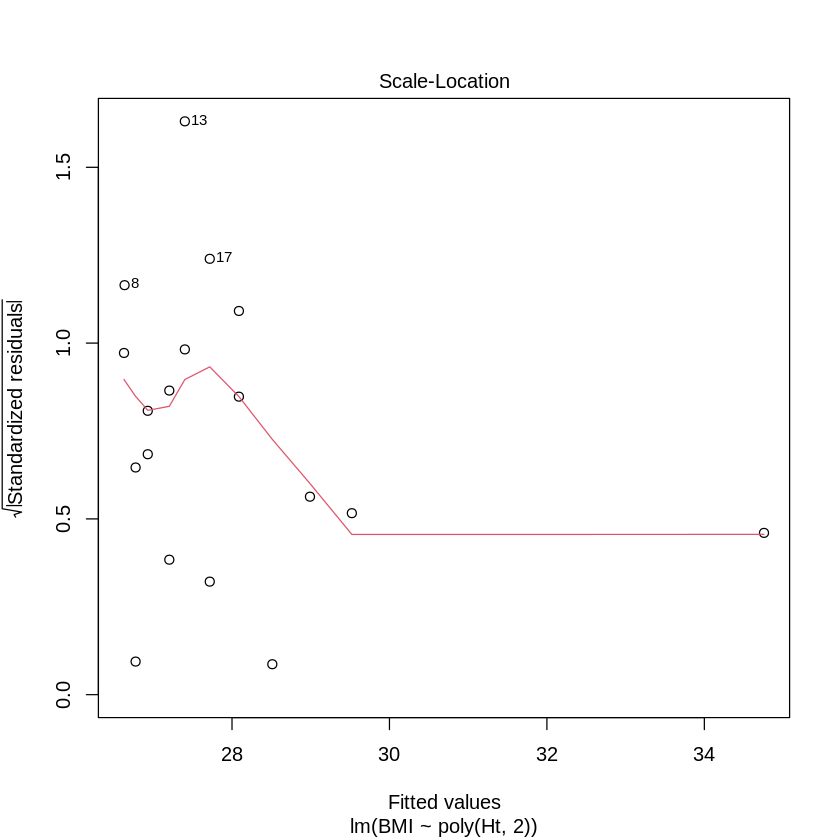

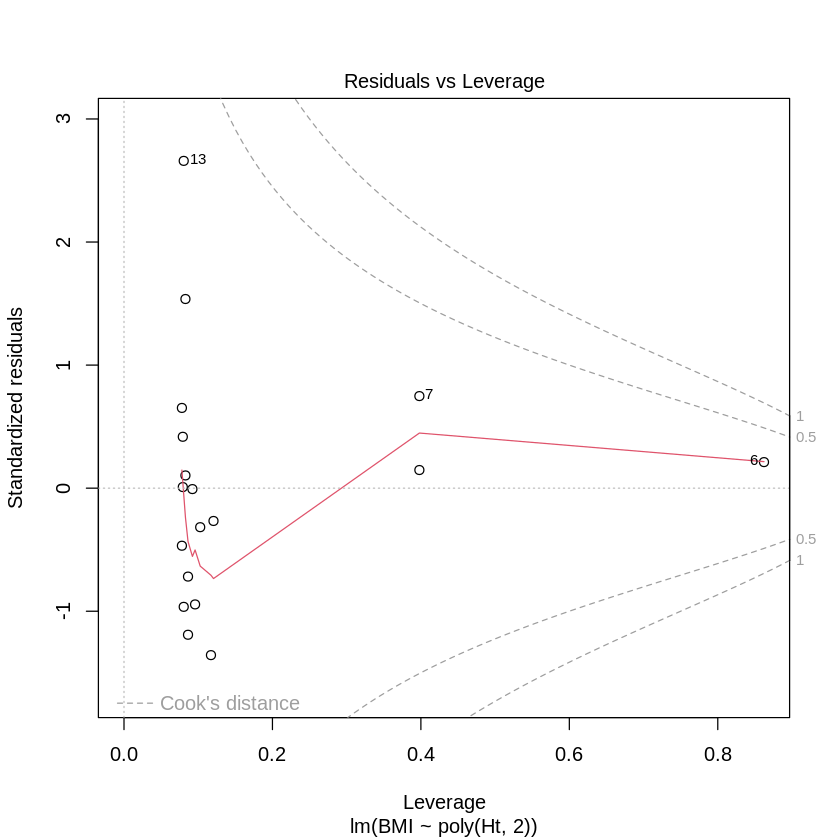

In [ ]:
plot(poly_model)

на Residuals vs Fitted симметричность относительно нижней и верхней части графика

на qqplot остатки распределены нормально

на Scale-Location plot гетероскедастичность остатков

на Residuals vs Leverage нет высоких точек справа

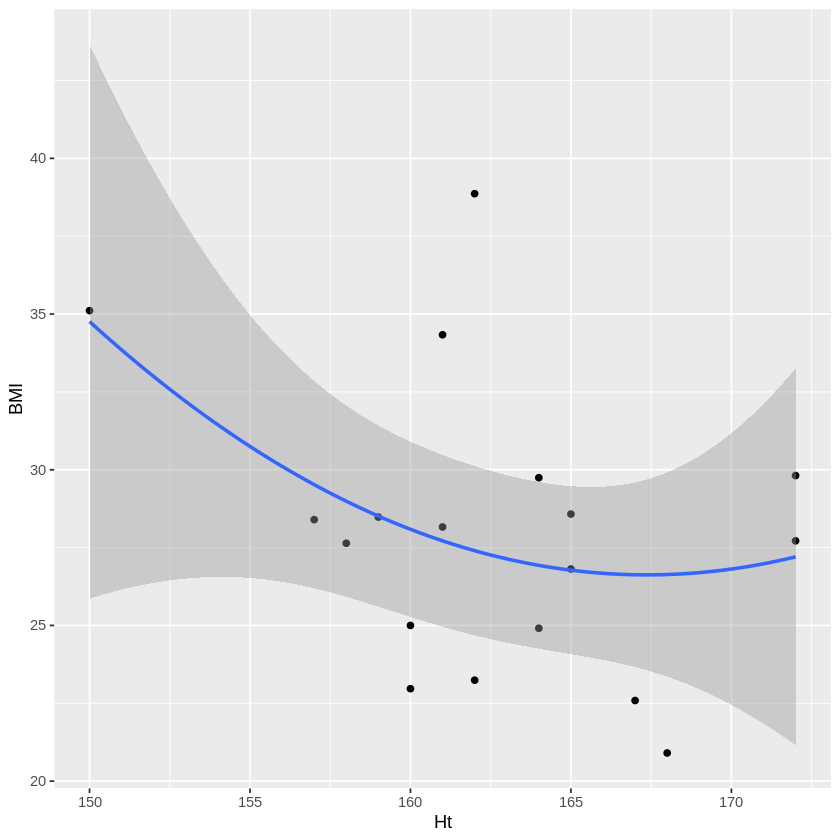

In [ ]:
ggplot(data, aes (x=Ht, y=BMI)) +
  geom_point() +
  stat_smooth(method='lm', formula = y ~ poly (x,2), size = 1) +
  xlab('Ht') +
  ylab('BMI')

Невозможно сделать вывод о гипотезах из-за недостатка данных.

# Гипотеза №4.
Гипотеза: влияет ли уровнь холестерина на факт наличия артериальной гипертензии в семейном анамнезе?

H0 - уровнь холестерина не влияет на факт наличия артериальной гипертензии в семейном анамнезе.

H1 - уровнь холестерина влияет на факт наличия артериальной гипертензии в семейном анамнезе.

ЗП - A_H - категориальная, бинарная

НП - Choi...92 - количественная, непрерывная

# Логистическая регрессия

In [ ]:
data_glm <- glm(A_H ~ Choi...92, data, family = binomial())
summary(data_glm)


Call:
glm(formula = A_H ~ Choi...92, family = binomial(), data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  7.87649    4.05945   1.940   0.0523 .
Choi...92   -0.03312    0.01653  -2.003   0.0452 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 24.731  on 17  degrees of freedom
Residual deviance: 18.948  on 16  degrees of freedom
AIC: 22.948

Number of Fisher Scoring iterations: 4


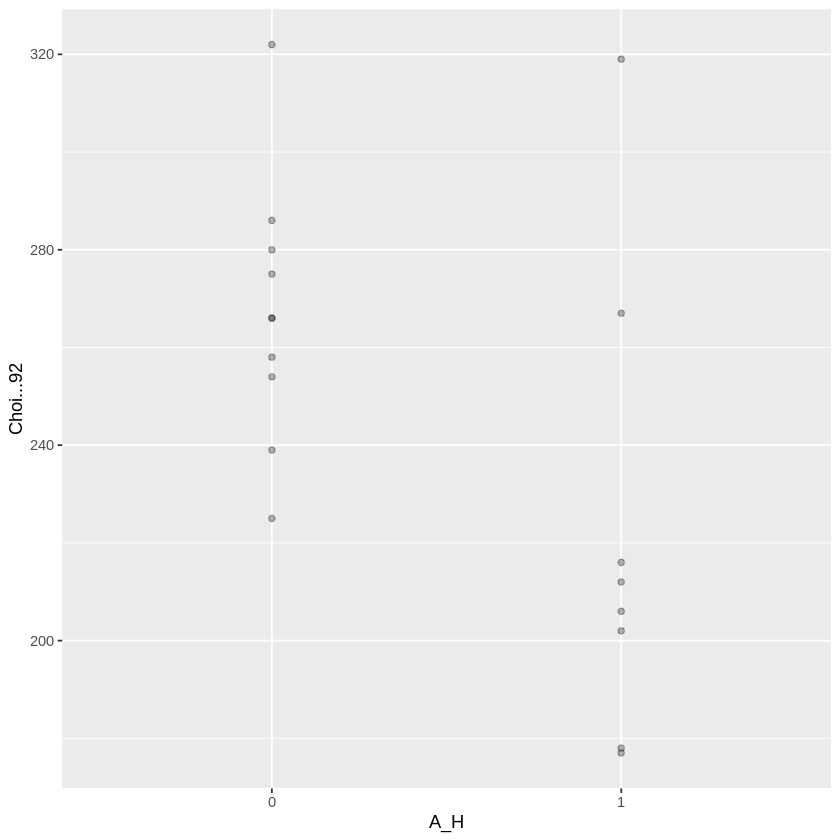

In [ ]:
ggplot(data = data, aes(x = A_H, y = Choi...92)) +
  geom_point(alpha = 0.3) +
  geom_abline(slope = data_glm$coefficients[2], intercept = data_glm$coefficients[1])
  #geom_smooth(A_H ~ Choi...92)

Наблюдается влияние уровня холестерина на факт наличия артериальной гипертензии в семейном анамнезе.

AIC: 22.948

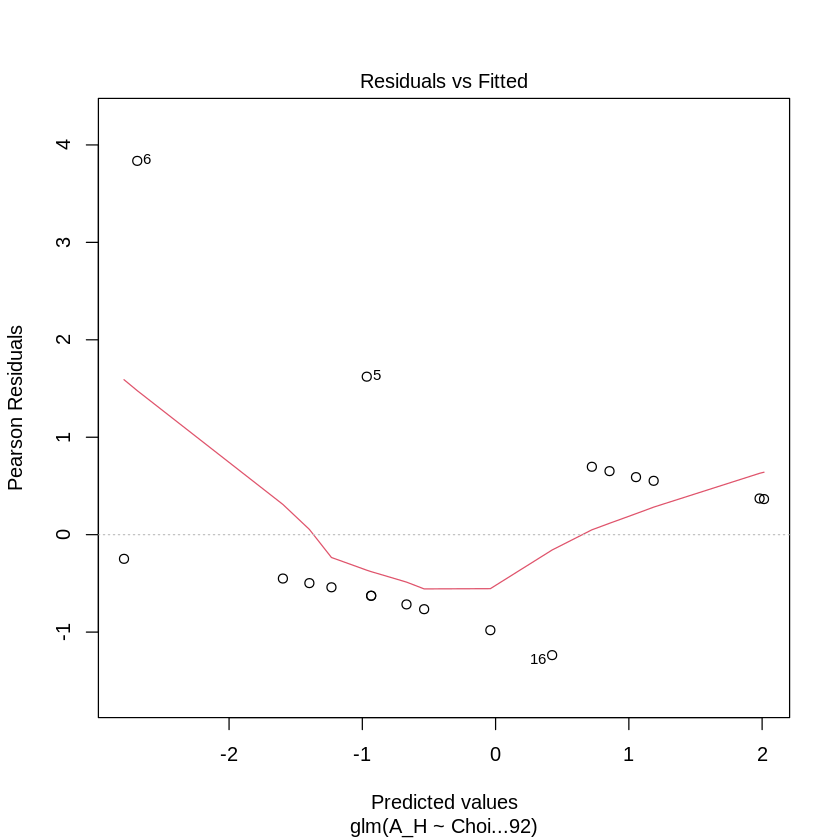

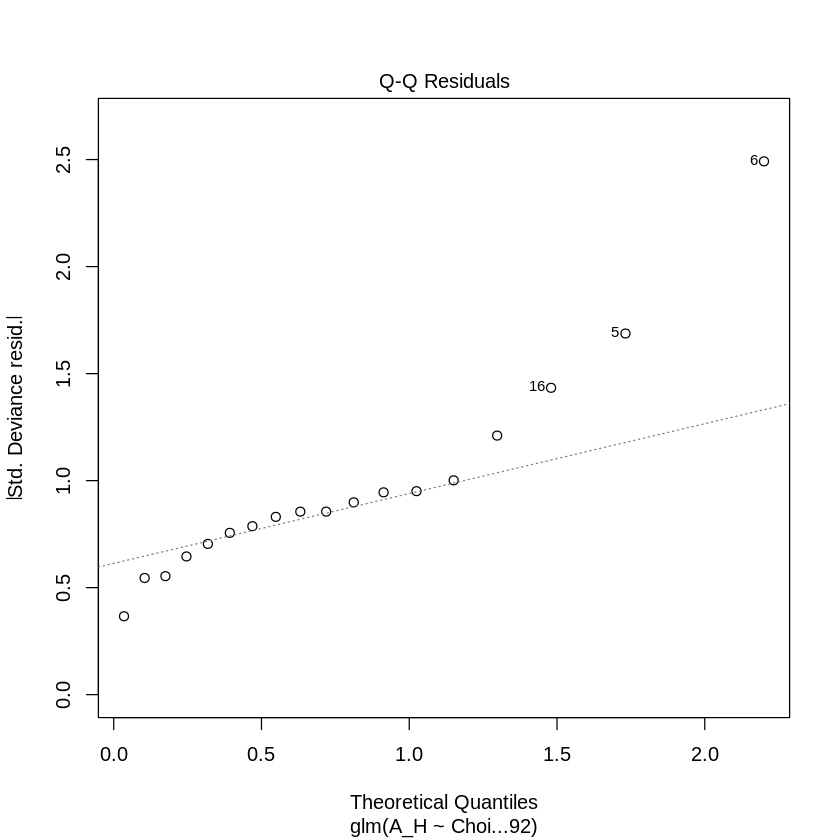

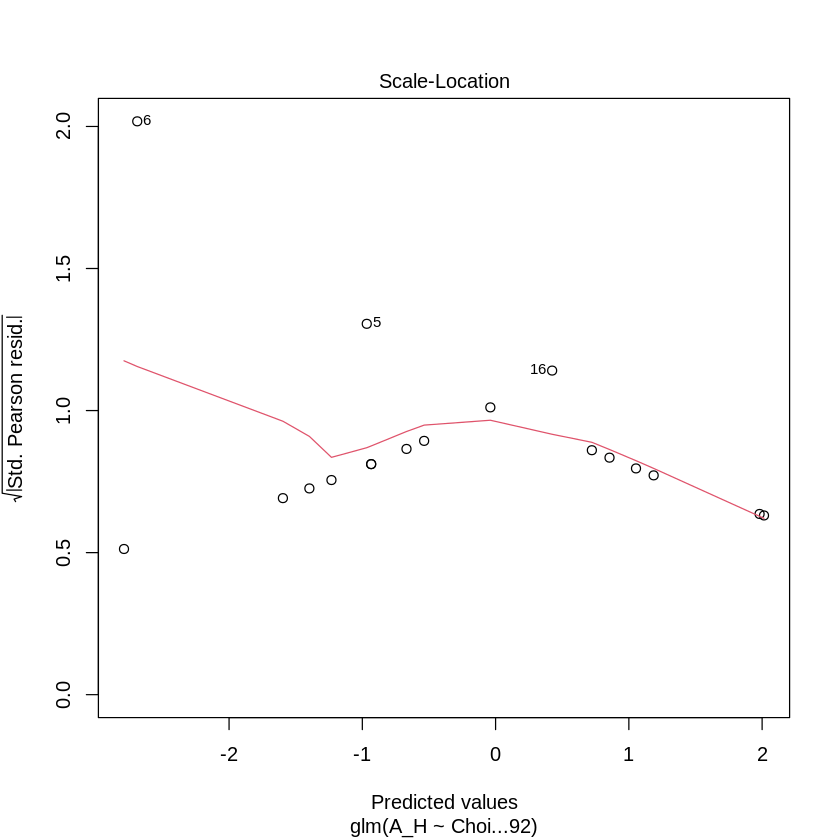

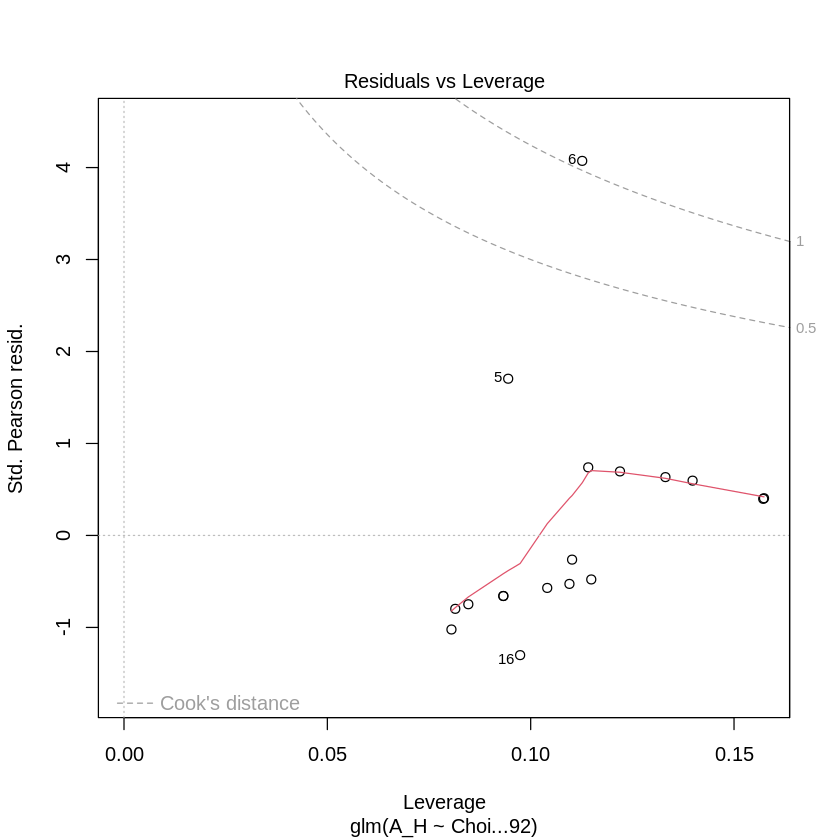

In [ ]:
plot(data_glm)

на Residuals vs Fitted с правой стороны нет точек, которые были бы высоко или низко по оси Y

на qqplot остатки распределены не нормально

на Scale-Location plot наблюдаются выбросы

на Residuals vs Leverage есть высокие точки, которые могут поменять направление регрессии

Отвергаем нулевую гепотезу.

In [ ]:
# модель с дополнительной переменной Tgi...93
data_glm <- glm(A_H ~ Choi...92 + Tgi...93, data, family = binomial())
summary(data_glm)


Call:
glm(formula = A_H ~ Choi...92 + Tgi...93, family = binomial(), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) 47.18092   38.19801   1.235    0.217
Choi...92   -0.23947    0.19361  -1.237    0.216
Tgi...93     0.10901    0.09437   1.155    0.248

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 24.7306  on 17  degrees of freedom
Residual deviance:  7.2657  on 15  degrees of freedom
AIC: 13.266

Number of Fisher Scoring iterations: 9


Влияние переменных исчезло.

AIC понизился, качество модели улучшилось.

С учетом третьем переменной отвергнуть нулевую гипотезу нельзя.

# Гипотеза №5.
Гипотеза: изменится ли коэффициент атерогенности в зависмости от статуса курения?

H0 - коэффициент атерогенности не изменится в зависмости от статуса курения.

H1 - коэффициент атерогенности изменится в зависмости от статуса курения.

ЗП - AI - дискретная (разбили по группам, посчитали количество)

НП - Sm - категориальная

# Пуассоновская регрессия

In [ ]:
# создадим колонку с количеством по группам AI
data <- data %>%
  mutate(ai_group = factor(case_when(AI <= 1.75 ~ '1',
                               AI <= 2.5 ~ '2',
                               AI <= 3.25 ~ '3',
                               .default = '4')),
         count = sample(x = 1:18, size  = nrow(data)))

In [ ]:
data %>%
  group_by(ai_group) %>%
  summarise(mean_count = mean(count))

ai_group,mean_count
<fct>,<dbl>
1,4.500000
2,10.750000
3,8.571429
4,11.800000


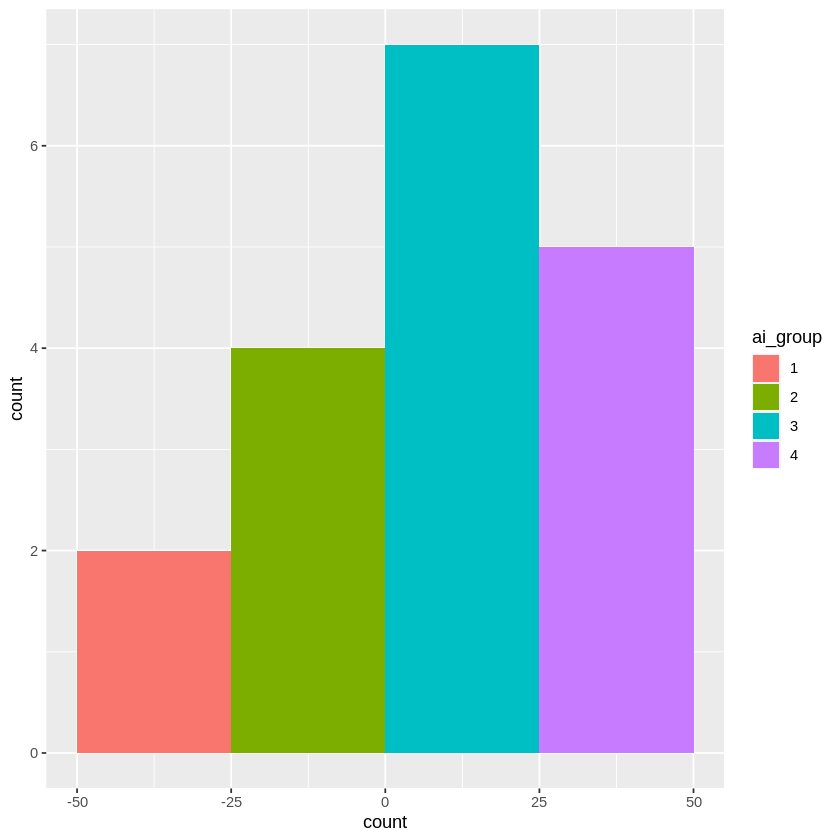

In [ ]:
ggplot(data, aes(count, fill = ai_group)) +
  geom_histogram(binwidth = 100, position = "dodge")

In [ ]:
model <- glm(count ~ ai_group + Sm, family = "poisson" ,
             data = data)

In [ ]:
summary(model)


Call:
glm(formula = count ~ ai_group + Sm, family = "poisson", data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.5041     0.3333   4.512 6.41e-06 ***
ai_group2     0.8708     0.3666   2.376 0.017517 *  
ai_group3     0.4418     0.3673   1.203 0.229027    
ai_group4     0.9640     0.3579   2.694 0.007062 ** 
Sm1           0.9445     0.2817   3.353 0.000801 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 57.545  on 17  degrees of freedom
Residual deviance: 37.426  on 13  degrees of freedom
AIC: 117.48

Number of Fisher Scoring iterations: 5


есть зависимость переменных при включении фактора Sm

AIC: 117.48

отвергаем нулевую гипотезу

Warning message:
“not plotting observations with leverage one:
  9”


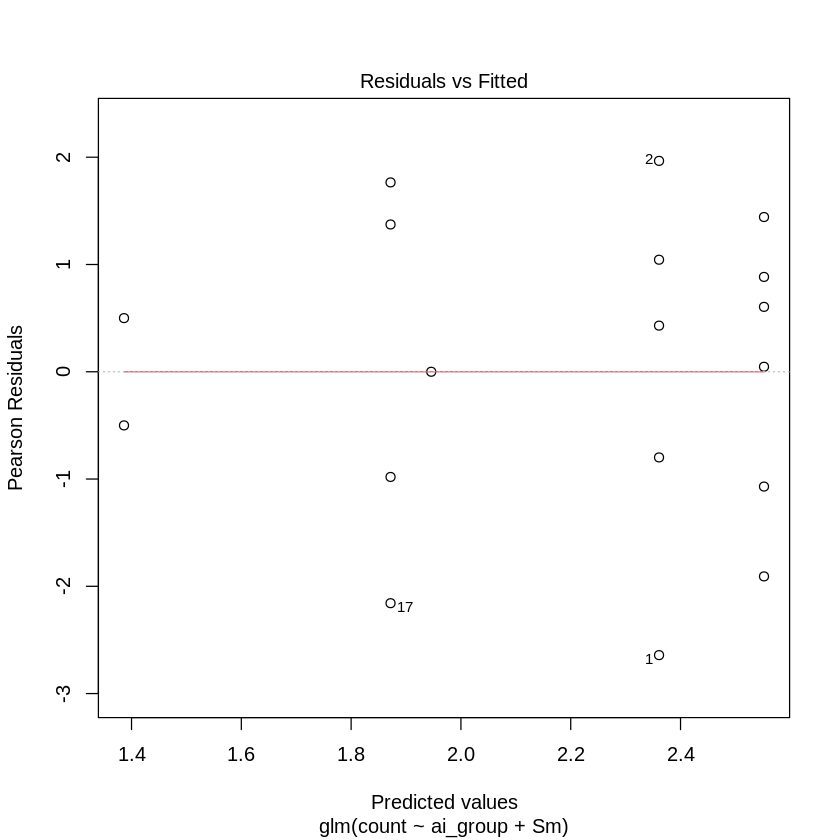

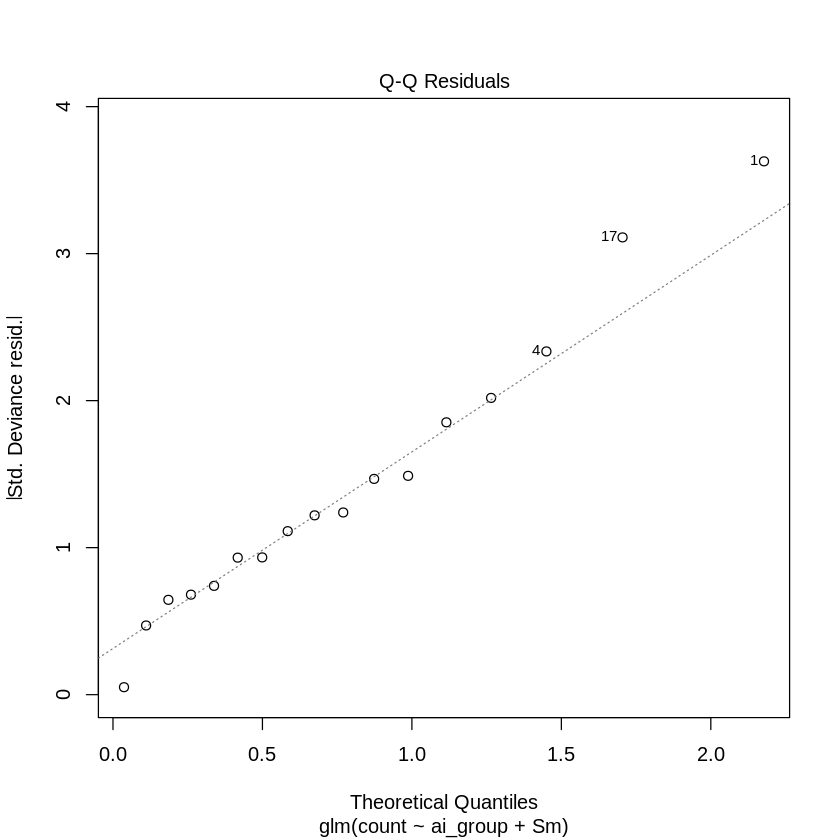

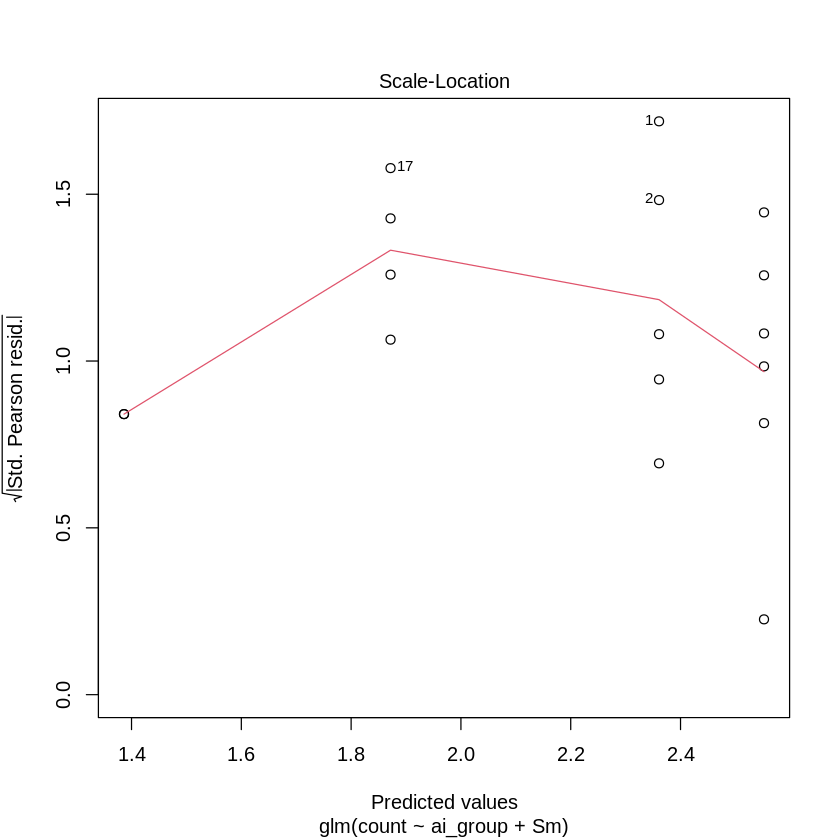

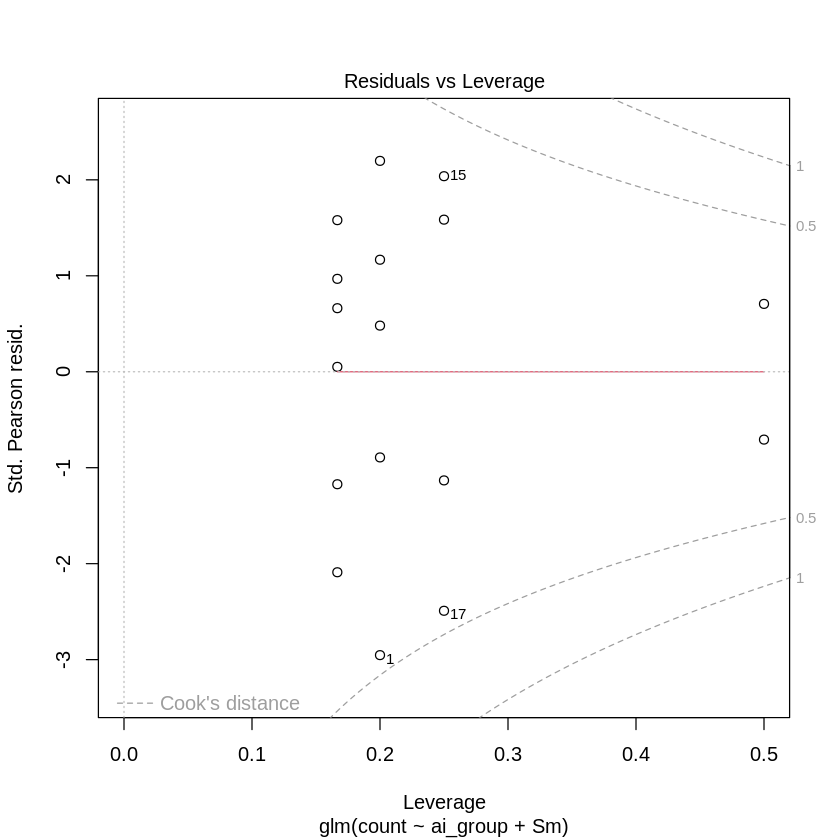

In [ ]:
plot(model)

на Residuals vs Fitted наблюдается относительная симметричность, разброс примерно одинаковый

на qqplot остатки распределены нормально

на Scale-Location plot наблюдаются выбросы

на Residuals vs Leverage нет высоких точек по Y c правой стороны графика

In [ ]:
# качество модели
pchisq(37.426, 13, lower.tail = FALSE)

[1] 0.0003551473

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


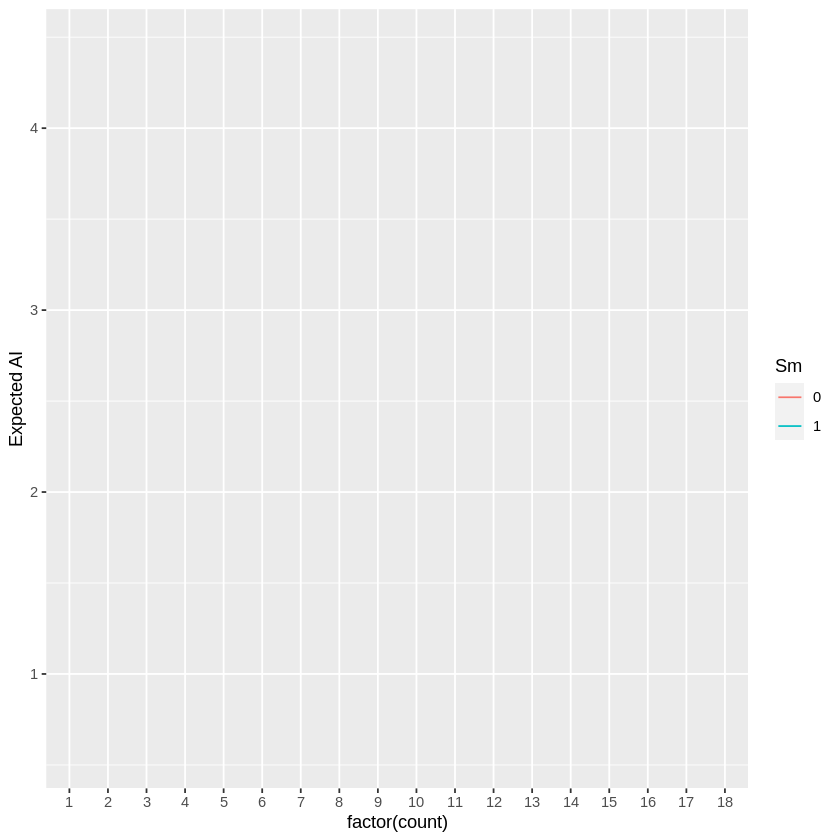

In [ ]:
# график не выводится (
ggplot(data, aes(x = factor(count), y = AI, color = Sm)) +
  geom_line() +
  labs(y = "Expected AI")